<a href="https://colab.research.google.com/github/sinyee2002/UniTalk/blob/main/Group_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA



## Read CSV File

In [ ]:
# Read CSV data and print 10 rows of data
ds = pd.read_csv("dataset.csv")
ds.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


## Data Understanding

In [ ]:
# Show information of data
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
# Understanding the dataset's structure and dimensions
print("Dataset shape:", ds.shape)
print("Column names:", ds.columns)

# Examining the dataset's summary statistics
print("\nSummary statistics:")
print(ds.describe())

Dataset shape: (480, 17)
Column names: Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

Summary statistics:
       raisedhands  VisITedResources  AnnouncementsView  Discussion
count   480.000000        480.000000         480.000000  480.000000
mean     46.775000         54.797917          37.918750   43.283333
std      30.779223         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.750000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     100.000000         99.000000          98.000000   99.000000


In [ ]:
# Exploring categorical variables
categorical_columns = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID','GradeID', 'SectionID',
                      'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
                      'StudentAbsenceDays', 'Class']
for column in categorical_columns:
    if ds[column].dtype == 'object':
        print("\nUnique value in", column)
        print(ds[column].unique())
        print("Value counts:")
        print(ds[column].value_counts())

# Displaying basic statistics for numerical columns
numerical_columns = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
for column in numerical_columns:
    print("\nStatistics for", column)
    print(ds[column].describe())


Unique value in gender
['M' 'F']
Value counts:
gender
M    305
F    175
Name: count, dtype: int64

Unique value in NationalITy
['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
Value counts:
NationalITy
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64

Unique value in PlaceofBirth
['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
Value counts:
PlaceofBirth
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco      

C:\Users\vince\AppData\Local\Temp\ipykernel_10124\3517296301.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ParentschoolSatisfaction", data=ds, palette=colors)
C:\Users\vince\AppData\Local\Temp\ipykernel_10124\3517296301.py:16: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x="ParentschoolSatisfaction", data=ds, palette=colors)


ParentschoolSatisfaction
Good    292
Bad     188
Name: count, dtype: int64

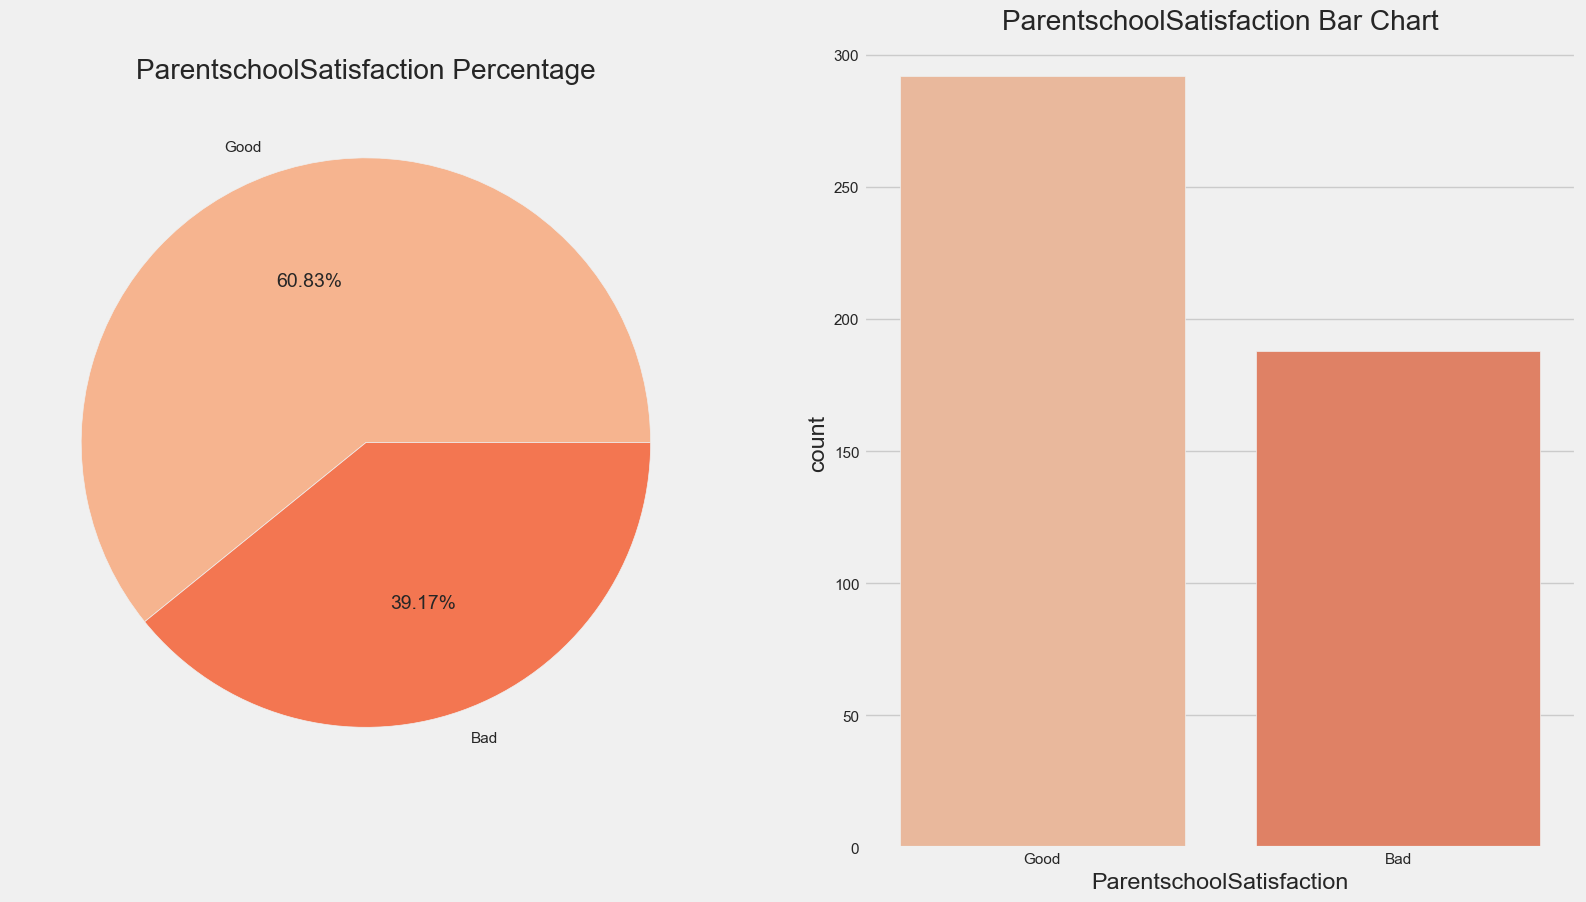

In [ ]:
# Visualize the distribution of target column from dataset
colors=sns.color_palette('rocket_r')
labels=ds['ParentschoolSatisfaction'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('ParentschoolSatisfaction Percentage')
plt.pie(ds['ParentschoolSatisfaction'].value_counts(),
        labels=labels,
        colors=colors,
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('ParentschoolSatisfaction Bar Chart')
sns.countplot(x="ParentschoolSatisfaction", data=ds, palette=colors)

ds.ParentschoolSatisfaction.value_counts(dropna=False)

C:\Users\vince\AppData\Local\Temp\ipykernel_10124\2647100604.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='raisedhands', data=ds, palette='viridis')


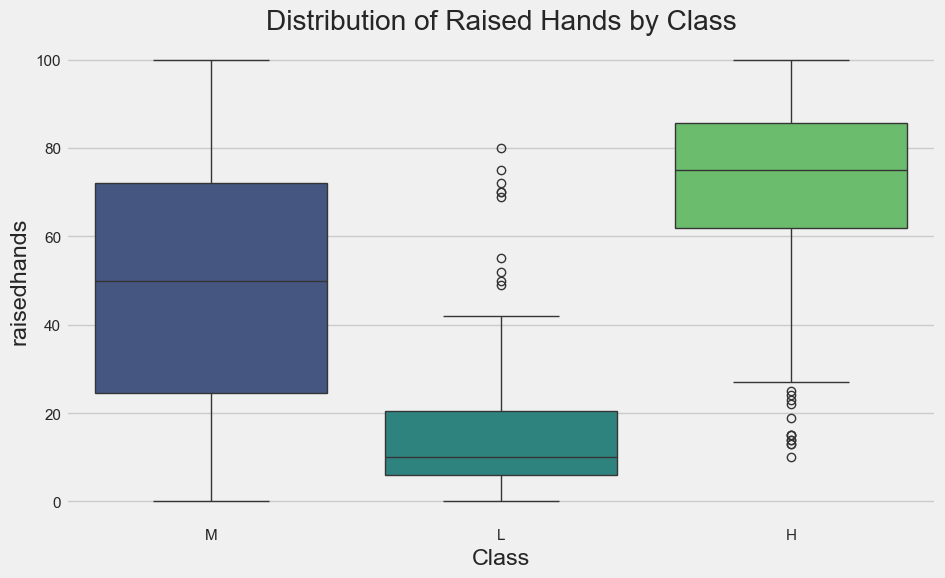

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='raisedhands', data=ds, palette='viridis')
plt.title('Distribution of Raised Hands by Class')
plt.show()

### Create Test Set

In [ ]:
train_set, test_set = train_test_split(ds, test_size=0.2, random_state=42)

print(train_set.head())
print("Length of train_set:", len(train_set))
print("Length of test_set:", len(test_set))

    gender NationalITy PlaceofBirth       StageID GradeID SectionID    Topic  \
132      M          KW       KuwaIT    lowerlevel    G-02         C       IT   
228      M          KW       KuwaIT    HighSchool    G-11         B     Math   
473      M   Palestine    Palestine  MiddleSchool    G-08         A  Geology   
42       M          KW       KuwaIT    HighSchool    G-09         A       IT   
360      M      Jordan       Jordan    lowerlevel    G-02         A   Arabic   

    Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
132        S   Father            0                 3                 10   
228        S      Mum           73                84                 77   
473        S   Father           85                88                 79   
42         F   Father           10                12                  7   
360        F   Father           20                88                 31   

     Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
13

In [ ]:
#Check Missing Values
missing_values_count = train_set.isnull().sum()
percentage_missing = (train_set.isnull().sum() / len(train_set)) * 100

missing_values = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage of Missing Values': percentage_missing
})

print(missing_values)

                          Missing Values  Percentage of Missing Values
gender                                 0                           0.0
NationalITy                            0                           0.0
PlaceofBirth                           0                           0.0
StageID                                0                           0.0
GradeID                                0                           0.0
SectionID                              0                           0.0
Topic                                  0                           0.0
Semester                               0                           0.0
Relation                               0                           0.0
raisedhands                            0                           0.0
VisITedResources                       0                           0.0
AnnouncementsView                      0                           0.0
Discussion                             0                           0.0
Parent

### Data Visualization

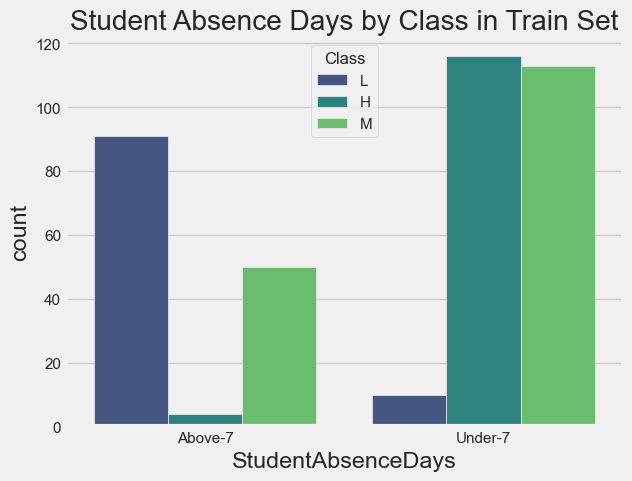

In [ ]:
sns.countplot(x='StudentAbsenceDays', hue='Class', data=train_set, palette='viridis')
plt.title('Student Absence Days by Class in Train Set')
plt.show()

C:\Users\vince\AppData\Local\Temp\ipykernel_10124\720715845.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=train_set, palette='viridis')


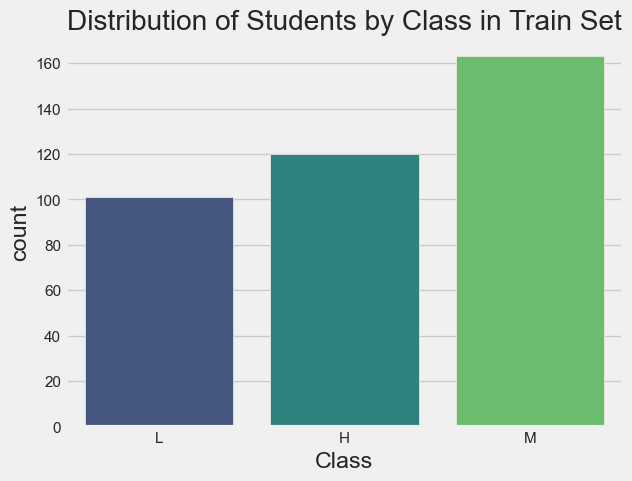

In [ ]:
sns.countplot(x='Class', data=train_set, palette='viridis')
plt.title('Distribution of Students by Class in Train Set')
plt.show()


C:\Users\vince\AppData\Local\Temp\ipykernel_10124\1404361456.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='raisedhands', data=train_set, palette='viridis')


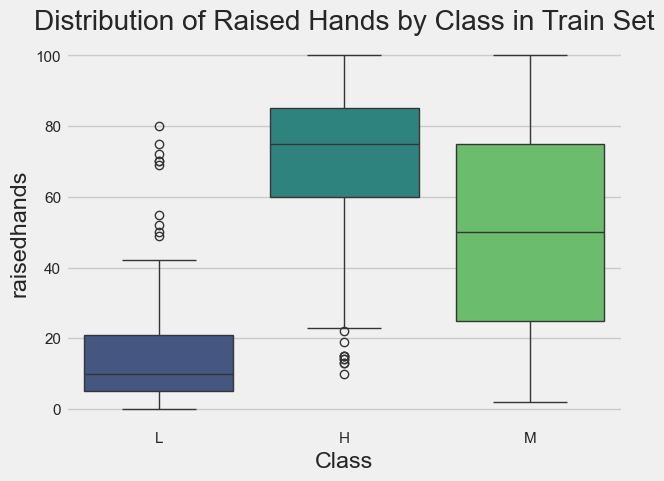

In [ ]:
sns.boxplot(x='Class', y='raisedhands', data=train_set, palette='viridis')
plt.title('Distribution of Raised Hands by Class in Train Set')
plt.show()


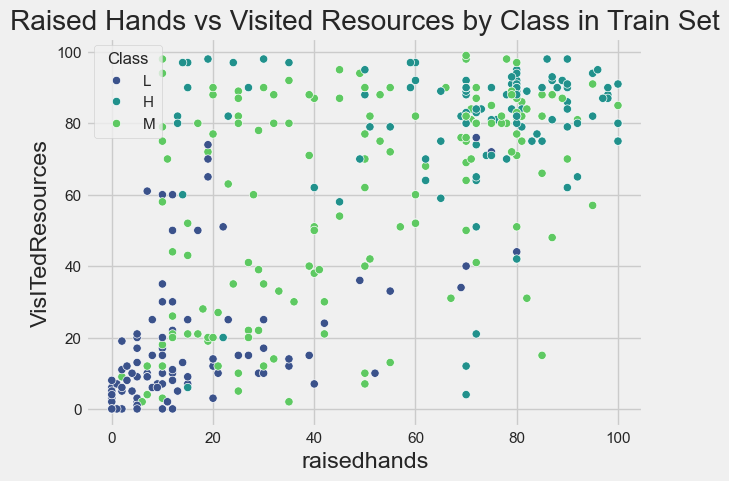

In [ ]:
sns.scatterplot(x='raisedhands', y='VisITedResources', hue='Class', data=train_set, palette='viridis')
plt.title('Raised Hands vs Visited Resources by Class in Train Set')
plt.show()


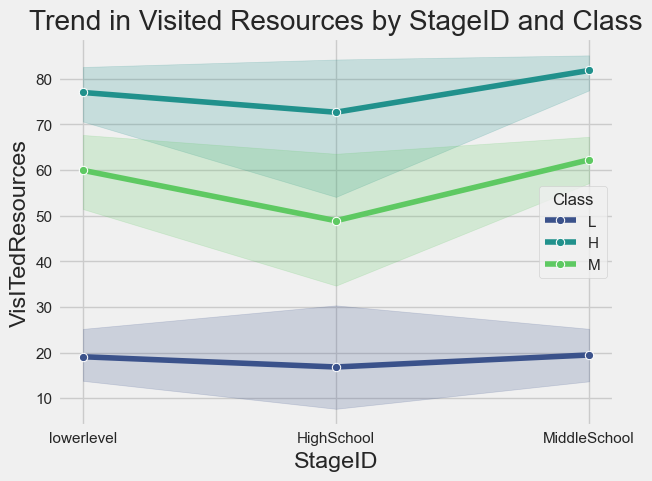

In [ ]:
sns.lineplot(x='StageID', y='VisITedResources', hue='Class', data=train_set, marker='o', palette='viridis')
plt.title('Trend in Visited Resources by StageID and Class')
plt.show()


In [ ]:
pd.crosstab([train_set['StageID']], train_set['VisITedResources'])

VisITedResources,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,97,98,99
StageID,,,,,,,,,,,,,,,,,,,,,
HighSchool,0,0,0,0,1,2,0,0,0,0,...,0,2,1,0,0,0,0,0,0,0
MiddleSchool,4,0,3,1,0,2,2,1,2,2,...,5,11,4,3,1,2,2,1,3,0
lowerlevel,3,1,4,3,2,1,3,5,1,4,...,2,10,0,4,1,2,2,6,5,1


## Correlation between attributes

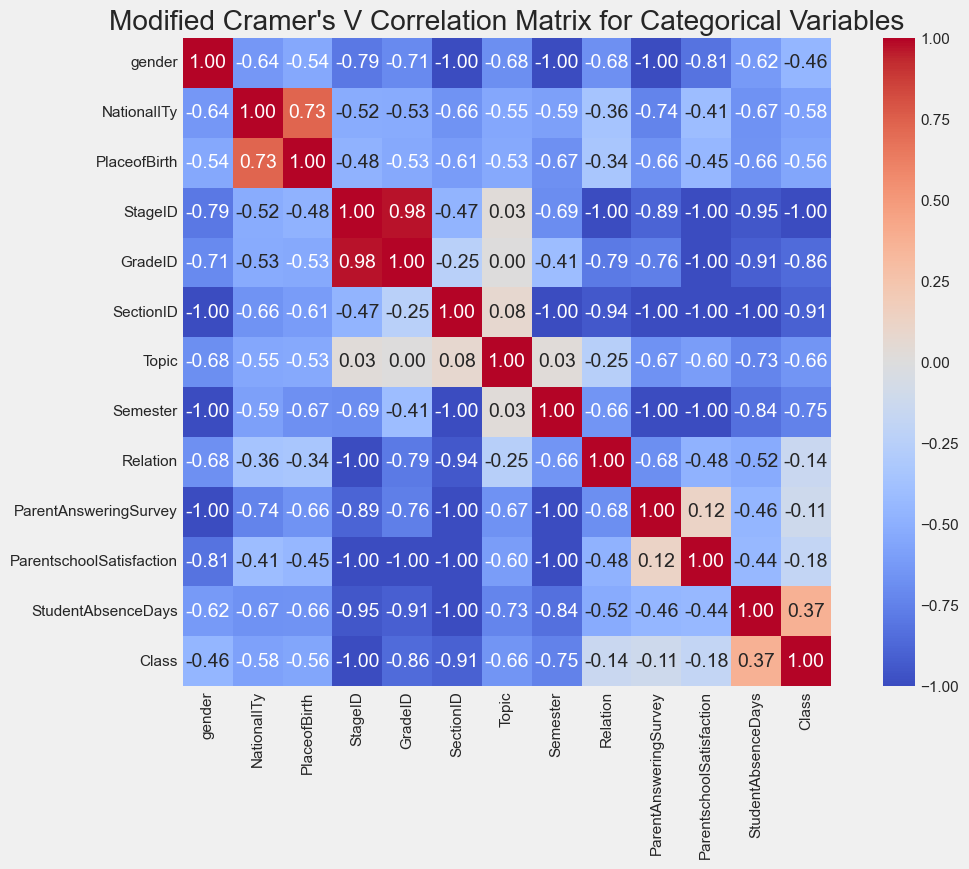

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate the Cramér's V correlation matrix for categorical columns
categorical_columns = train_set.select_dtypes(include=['object']).columns
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for i in range(len(categorical_columns)):
    for j in range(len(categorical_columns)):
        if i == j:
            correlation_matrix.iloc[i, j] = 1.0
        else:
            correlation_matrix.iloc[i, j] = cramers_v(train_set[categorical_columns[i]], train_set[categorical_columns[j]])

# Convert Cramér's V to a range of -1 to 1
correlation_matrix = 2 * (correlation_matrix - 0.5)

# Convert the matrix to float for heatmap
correlation_matrix = correlation_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, square=True)
plt.title('Modified Cramer\'s V Correlation Matrix for Categorical Variables')
plt.show()

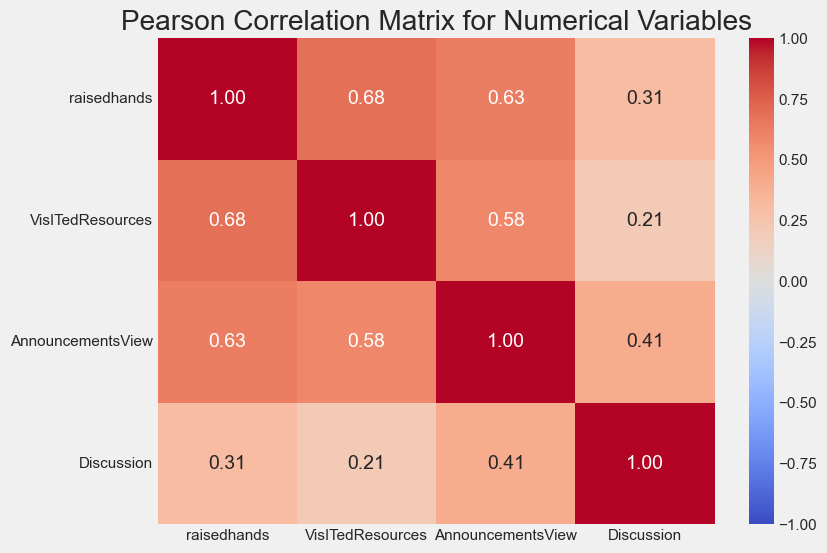


Statistics for raisedhands
count    384.000000
mean      47.492188
std       30.934361
min        0.000000
25%       15.000000
50%       50.000000
75%       76.250000
max      100.000000
Name: raisedhands, dtype: float64

Statistics for VisITedResources
count    384.000000
mean      55.476562
std       33.154665
min        0.000000
25%       20.000000
50%       70.000000
75%       84.250000
max       99.000000
Name: VisITedResources, dtype: float64

Statistics for AnnouncementsView
count    384.000000
mean      38.549479
std       27.262435
min        0.000000
25%       14.000000
50%       33.000000
75%       60.500000
max       98.000000
Name: AnnouncementsView, dtype: float64

Statistics for Discussion
count    384.000000
mean      43.901042
std       27.188456
min        1.000000
25%       20.750000
50%       39.000000
75%       70.000000
max       98.000000
Name: Discussion, dtype: float64


In [ ]:
# Calculating the Pearson correlation matrix for numerical columns
# Define the numerical columns for correlation
numerical_columns = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

# Calculate the Pearson correlation matrix
numerical_corr_matrix = train_set[numerical_columns].corr()

# Plotting the heatmap for the Pearson correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix for Numerical Variables')
plt.show()

# Displaying basic statistics for numerical columns
for column in numerical_columns:
    print("\nStatistics for", column)
    print(train_set[column].describe())


In [ ]:
categorical_columns = train_set.select_dtypes(include=['object']).columns
correlation_with_target = pd.Series(index=categorical_columns)

for column in categorical_columns:
    correlation_with_target[column] = cramers_v(train_set[column], train_set['Class'])

# Sort the correlation with the target variable in descending order
correlation_with_target_sorted = correlation_with_target.sort_values(ascending=False)

# Print the correlation with the target variable in descending order
print(correlation_with_target_sorted)

Class                       1.000000
StudentAbsenceDays          0.685010
ParentAnsweringSurvey       0.442883
Relation                    0.428744
ParentschoolSatisfaction    0.409398
gender                      0.269752
PlaceofBirth                0.220175
NationalITy                 0.207957
Topic                       0.172235
Semester                    0.126055
GradeID                     0.071535
SectionID                   0.047022
StageID                     0.000000
dtype: float64


In [ ]:
# Compute Pearson correlation between numerical columns and the target variable
correlation_with_target_numerical = pd.Series(index=numerical_columns)

for column in numerical_columns:
    correlation_with_target_numerical[column] = train_set[column].corr(train_set['raisedhands'])

# Sort the correlation with the target variable in descending order
correlation_with_target_numerical_sorted = correlation_with_target_numerical.sort_values(ascending=False)

# Print the correlation with the target variable in descending order
print(correlation_with_target_numerical_sorted)


raisedhands          1.000000
VisITedResources     0.683958
AnnouncementsView    0.629087
Discussion           0.308926
dtype: float64


In [ ]:
# Identify transformation
skewed_features = ds[numerical_columns].skew()
print("Skewed Numerical Features:\n", skewed_features)

Skewed Numerical Features:
 raisedhands          0.026962
VisITedResources    -0.342441
AnnouncementsView    0.399243
Discussion           0.362594
dtype: float64


### Identify attributes combination

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Select categorical columns
categorical_columns = train_set.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
for column in categorical_columns:
    train_set[column] = label_encoder.fit_transform(train_set[column])

# Display the first few rows to verify the changes
print(train_set.head())


     gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
132       1            4             4        2        0          2      7   
228       1            4             4        0        8          1      8   
473       1            7             7        1        5          0      5   
42        1            4             4        0        6          0      7   
360       1            3             3        2        0          0      0   

     Semester  Relation  raisedhands  VisITedResources  AnnouncementsView  \
132         1         0            0                 3                 10   
228         1         1           73                84                 77   
473         1         0           85                88                 79   
42          0         0           10                12                  7   
360         0         0           20                88                 31   

     Discussion  ParentAnsweringSurvey  ParentschoolSatisfaction  \


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a cross-tabulation including 'ParentschoolSatisfaction'
cross_tab_adaptability_in = pd.crosstab(index=[train_set['Class'], train_set['StudentAbsenceDays']], columns=train_set['ParentschoolSatisfaction'])

# Perform the chi-squared test
chi2_in, p_in, dof_in, expected_in = chi2_contingency(cross_tab_adaptability_in)

# Print the results
print("Combination'Class' and 'StudentAbsenceDays with ParentschoolSatisfaction")
print("Chi-squared statistic:", chi2_in)
print("p-value:", p_in)
print("Degrees of freedom:", dof_in)
print("Expected frequencies:\n", expected_in)

print("==========================================================================")

# Chi-squared test for 'Age' and 'Adaptability Level'
chi2_inte, p_inte, _, _ = chi2_contingency(pd.crosstab(train_set['Class'], train_set['StudentAbsenceDays']))

# Chi-squared test for 'Education Level' and 'Adaptability Level'
chi2_net, p_net, _, _ = chi2_contingency(pd.crosstab(train_set['Class'], train_set['StudentAbsenceDays']))

# Print the results
print("chi2 for Class and y:",chi2_inte)
print("chi2 for StudentAbsenceDays and y:",chi2_net)
print("Chi-squared p-value for 'Class' and  ParentschoolSatisfaction:", p_inte)
print("Chi-squared p-value for'StudentAbsenceDays Type'and ParentschoolSatisfaction:", p_net)

Combination'Class' and 'StudentAbsenceDays with ParentschoolSatisfaction
Chi-squared statistic: 68.77081923953529
p-value: 1.8464406929182368e-13
Degrees of freedom: 5
Expected frequencies:
 [[ 1.5625    2.4375  ]
 [45.3125   70.6875  ]
 [35.546875 55.453125]
 [ 3.90625   6.09375 ]
 [19.53125  30.46875 ]
 [44.140625 68.859375]]
chi2 for Class and y: 181.7223468944885
chi2 for StudentAbsenceDays and y: 181.7223468944885
Chi-squared p-value for 'Class' and  ParentschoolSatisfaction: 3.4633290252075135e-40
Chi-squared p-value for'StudentAbsenceDays Type'and ParentschoolSatisfaction: 3.4633290252075135e-40


## Data Preprocessing

In [ ]:
ds = train_set.drop("Class", axis=1)
ds_labels = train_set["Class"].copy()

## Transformation Piplines and Feature Scaling For Numeric Attrributes

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Define numerical attributes
num_attribs = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

# Create a pipeline for numerical attributes
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),  # Impute missing values with the median
    StandardScaler()                   # Standardize the numerical attributes
)



## Transformation Piplines and Feature Encoding For Categorical Attribute

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Define the categorical attributes
cat_attribs = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID',
               'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
               'StudentAbsenceDays']

# Create a pipeline for categorical attributes
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),  # Impute missing values with the most frequent value
    OneHotEncoder(handle_unknown="ignore")    # OneHotEncoder for categorical attributes
)



In [ ]:
# Combine both pipelines into a ColumnTransformer
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)# Numerical pipeline
])

ds_prepared = preprocessing.fit_transform(ds)
ds_prepared

<384x72 sparse matrix of type '<class 'numpy.float64'>'
	with 6144 stored elements in Compressed Sparse Row format>

In [ ]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['raisedhands', 'VisITedResources',
                                  'AnnouncementsView', 'Discussion']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'NationalITy', 'PlaceofBirth',
                                  'StageID', 'GradeID', 'SectionID', 'Topic',
                                  'Semester', 'Relation',
                                  'ParentAnsweringSurvey',
                                  'ParentschoolSatisfaction',
                                  'StudentAbsenceDays'])])

In [ ]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
lencoder.fit(ds_labels)
ds_labels = lencoder.transform(ds_labels)
ds_labels

array([1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1,
       0, 1, 2, 2, 2, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0,
       2, 1, 2, 0, 0, 2, 2, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 0,
       2, 1, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0,
       0, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1,
       1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0,
       0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 1, 2, 2,
       1, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 0, 2, 2, 0,
       2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2,

In [ ]:
preprocessing.get_feature_names_out()

array(['num__raisedhands', 'num__VisITedResources',
       'num__AnnouncementsView', 'num__Discussion', 'cat__gender_0',
       'cat__gender_1', 'cat__NationalITy_0', 'cat__NationalITy_1',
       'cat__NationalITy_2', 'cat__NationalITy_3', 'cat__NationalITy_4',
       'cat__NationalITy_5', 'cat__NationalITy_6', 'cat__NationalITy_7',
       'cat__NationalITy_8', 'cat__NationalITy_9', 'cat__NationalITy_10',
       'cat__NationalITy_11', 'cat__NationalITy_12',
       'cat__NationalITy_13', 'cat__PlaceofBirth_0',
       'cat__PlaceofBirth_1', 'cat__PlaceofBirth_2',
       'cat__PlaceofBirth_3', 'cat__PlaceofBirth_4',
       'cat__PlaceofBirth_5', 'cat__PlaceofBirth_6',
       'cat__PlaceofBirth_7', 'cat__PlaceofBirth_8',
       'cat__PlaceofBirth_9', 'cat__PlaceofBirth_10',
       'cat__PlaceofBirth_11', 'cat__PlaceofBirth_12',
       'cat__PlaceofBirth_13', 'cat__StageID_0', 'cat__StageID_1',
       'cat__StageID_2', 'cat__GradeID_0', 'cat__GradeID_1',
       'cat__GradeID_2', 'cat__Grade

In [ ]:
lencoder.classes_

array([0, 1, 2])

##  Modelling

##  Decision Tree Classifier



In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV

tree_clf = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=42))
tree_clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'NationalITy',
                                                   'PlaceofBirth', 'StageID',
                                                   'GradeID', 'SectionID',
                                                   'Topic', 'Semester',
                                                   'Relation',
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [ ]:
tree_acc = cross_val_score(tree_clf,
                              ds, ds_labels,
                              scoring="accuracy",
                              cv=10)

tree_acc

array([0.66666667, 0.79487179, 0.74358974, 0.61538462, 0.81578947,
       0.76315789, 0.73684211, 0.78947368, 0.68421053, 0.73684211])

In [ ]:
mean_accuracy = np.mean(tree_acc)
std_accuracy = np.std(tree_acc)

print(f"Mean Accuracy: {mean_accuracy:.2f}")  # Mean of the accuracies
print(f"Standard Deviation: {std_accuracy:.2f}")  # Variation in the accuracies


Mean Accuracy: 0.73
Standard Deviation: 0.06


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdf=make_pipeline(preprocessing, RandomForestClassifier(class_weight='balanced',random_state=42))
rdf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'NationalITy',
                                                   'PlaceofBirth', 'StageID',
                                                   'GradeID', 'SectionID',
                                                   'Topic', 'Semester',
                                                   'Relation',
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [ ]:
rdf_acc = cross_val_score(rdf,
                              ds, ds_labels,
                              scoring="accuracy",
                              cv=10)

rdf_acc

array([0.82051282, 0.84615385, 0.69230769, 0.74358974, 0.81578947,
       0.81578947, 0.76315789, 0.86842105, 0.81578947, 0.86842105])

In [ ]:
mean_accuracy = np.mean(rdf_acc)
std_accuracy = np.std(rdf_acc)

print(f"Mean Accuracy: {mean_accuracy:.2f}")  # Mean of the accuracies
print(f"Standard Deviation: {std_accuracy:.2f}")  # Variation in the accuracies


Mean Accuracy: 0.80
Standard Deviation: 0.05


## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
sc=make_pipeline(preprocessing, SVC(class_weight='balanced', random_state=42))
sc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['raisedhands',
                                                   'VisITedResources',
                                                   'AnnouncementsView',
                                                   'Discussion']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'NationalITy',
                                                   'PlaceofBirth', 'StageID',
                                                   'GradeID', 'SectionID',
                                                   'Topic', 'Semester',
                                                   'Relation',
                                                   'ParentAnsweringSurvey',
                                                   'ParentschoolSatisfaction',
                                                   'StudentAbsenceDays'])])),
                ('svc', SVC(class_weight='balanced', random_state=42))])

In [ ]:
sc_acc = cross_val_score(sc,
                              ds, ds_labels,
                              scoring="accuracy",
                              cv=10)

sc_acc

array([0.76923077, 0.71794872, 0.76923077, 0.69230769, 0.73684211,
       0.76315789, 0.73684211, 0.68421053, 0.71052632, 0.76315789])

In [ ]:
mean_accuracy = np.mean(sc_acc)
std_accuracy = np.std(sc_acc)

print(f"Mean Accuracy: {mean_accuracy:.2f}")  # Mean of the accuracies
print(f"Standard Deviation: {std_accuracy:.2f}")  # Variation in the accuracies


Mean Accuracy: 0.73
Standard Deviation: 0.03


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define classifiers
models = {
    'Decision Tree': make_pipeline(preprocessing, DecisionTreeClassifier(random_state=42)),
    'Random Forest': make_pipeline(preprocessing, RandomForestClassifier(class_weight='balanced', random_state=42)),
    'SVC': make_pipeline(preprocessing, SVC(class_weight='balanced', random_state=42))
}

# Initialize dictionaries to store results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Evaluate each model
for model_name, model in models.items():
    # Get predictions for each fold
    predictions = cross_val_predict(model, ds, ds_labels, cv=10)

    # Calculate metrics
    accuracy = accuracy_score(ds_labels, predictions)
    precision = precision_score(ds_labels, predictions, average='weighted')
    recall = recall_score(ds_labels, predictions, average='weighted')
    f1 = f1_score(ds_labels, predictions, average='weighted')

    # Store results
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

# Create a DataFrame to display the results
import pandas as pd
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Optionally, you can sort the DataFrame by any metric to easily see the best-performing model
sorted_results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\nSorted by Accuracy:")
print(sorted_results_df)


           Model  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.734375   0.733570  0.734375  0.733528
1  Random Forest  0.804688   0.807644  0.804688  0.805455
2            SVC  0.734375   0.736075  0.734375  0.731700

Sorted by Accuracy:
           Model  Accuracy  Precision    Recall  F1 Score
1  Random Forest  0.804688   0.807644  0.804688  0.805455
0  Decision Tree  0.734375   0.733570  0.734375  0.733528
2            SVC  0.734375   0.736075  0.734375  0.731700


Decision Tree Classifier and Random Forest Classifier will be the promising models

## Baseline

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf=DummyClassifier()
dummy_acc=cross_val_score(dummy_clf,ds,ds_labels,cv=10,scoring='accuracy')
print(dummy_acc)
print(pd.Series(dummy_acc).describe())

[0.41025641 0.43589744 0.43589744 0.43589744 0.42105263 0.42105263
 0.42105263 0.42105263 0.42105263 0.42105263]
count    10.000000
mean      0.424426
std       0.008588
min       0.410256
25%       0.421053
50%       0.421053
75%       0.432186
max       0.435897
dtype: float64


## Identify key influencing features

In [ ]:
tree_model=DecisionTreeClassifier(random_state=42)
tree_model.fit(ds,ds_labels)
tree_feature_importances = tree_model.feature_importances_
tree_feature_importances

array([0.03681283, 0.06117463, 0.03711779, 0.        , 0.04947414,
       0.        , 0.03309333, 0.        , 0.06431295, 0.06801959,
       0.23898739, 0.10535849, 0.05406466, 0.04146363, 0.00531749,
       0.20480307])

In [ ]:

rdf_model=RandomForestClassifier(random_state=42)
rdf_model.fit(ds,ds_labels)
rdf_feature_importances = rdf_model.feature_importances_
rdf_feature_importances

array([0.02515934, 0.03578201, 0.03430678, 0.01624324, 0.0328179 ,
       0.01906165, 0.04284499, 0.01089903, 0.03963202, 0.15832383,
       0.1947628 , 0.12426908, 0.09295881, 0.03662399, 0.02253398,
       0.11378055])

In [ ]:
feature_names = ds.columns
rdf_feature_importance_dict = dict(zip(feature_names, rdf_feature_importances))
tree_feature_importance_dict = dict(zip(feature_names, tree_feature_importances))

# Sort and print feature importances for each model
print("Random Forest Feature Importances:")
sorted_rdf_features = sorted(rdf_feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_rdf_features:
    print(f"{feature}: {importance:.4f}")

Random Forest Feature Importances:
VisITedResources: 0.1948
raisedhands: 0.1583
AnnouncementsView: 0.1243
StudentAbsenceDays: 0.1138
Discussion: 0.0930
Topic: 0.0428
Relation: 0.0396
ParentAnsweringSurvey: 0.0366
NationalITy: 0.0358
PlaceofBirth: 0.0343
GradeID: 0.0328
gender: 0.0252
ParentschoolSatisfaction: 0.0225
SectionID: 0.0191
StageID: 0.0162
Semester: 0.0109


In [ ]:
print("Decision Tree Feature Importances:")
sorted_tree_features = sorted(tree_feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_tree_features:
    print(f"{feature}: {importance:.4f}")

Decision Tree Feature Importances:
VisITedResources: 0.2390
StudentAbsenceDays: 0.2048
AnnouncementsView: 0.1054
raisedhands: 0.0680
Relation: 0.0643
NationalITy: 0.0612
Discussion: 0.0541
GradeID: 0.0495
ParentAnsweringSurvey: 0.0415
PlaceofBirth: 0.0371
gender: 0.0368
Topic: 0.0331
ParentschoolSatisfaction: 0.0053
StageID: 0.0000
SectionID: 0.0000
Semester: 0.0000


                     Feature  RandomForest  DecisionTree
10          VisITedResources      0.194763      0.238987
9                raisedhands      0.158324      0.068020
11         AnnouncementsView      0.124269      0.105358
15        StudentAbsenceDays      0.113781      0.204803
12                Discussion      0.092959      0.054065
6                      Topic      0.042845      0.033093
8                   Relation      0.039632      0.064313
13     ParentAnsweringSurvey      0.036624      0.041464
1                NationalITy      0.035782      0.061175
2               PlaceofBirth      0.034307      0.037118
4                    GradeID      0.032818      0.049474
0                     gender      0.025159      0.036813
14  ParentschoolSatisfaction      0.022534      0.005317
5                  SectionID      0.019062      0.000000
3                    StageID      0.016243      0.000000
7                   Semester      0.010899      0.000000


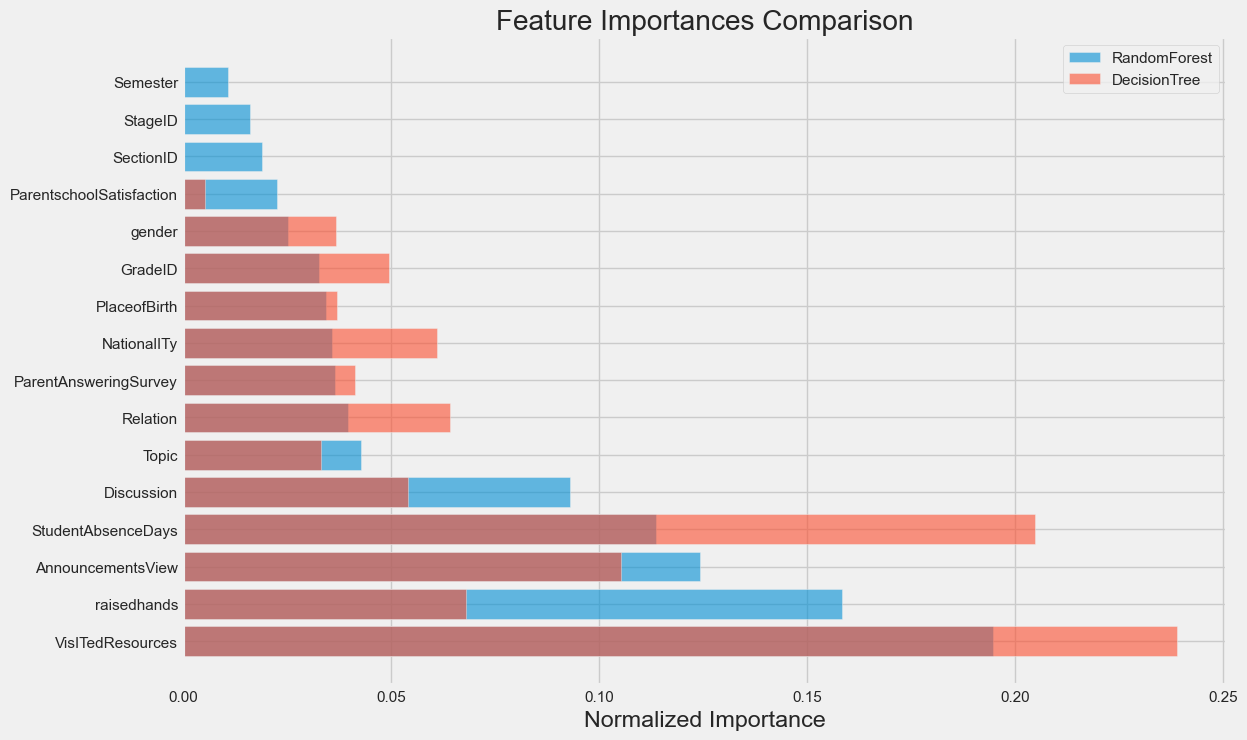

In [ ]:
# Create a DataFrame for comparison
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'RandomForest': [rdf_feature_importance_dict.get(feature, 0) for feature in feature_names],
    'DecisionTree': [tree_feature_importance_dict.get(feature, 0) for feature in feature_names]
})

# Normalize the feature importances
importance_df['RandomForest'] /= importance_df['RandomForest'].sum()
importance_df['DecisionTree'] /= importance_df['DecisionTree'].sum()

# Sort features by RandomForest importance for better readability
importance_df = importance_df.sort_values(by='RandomForest', ascending=False)

# Print the feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(12, 8))


# Plot RandomForest importances
plt.barh(importance_df['Feature'], importance_df['RandomForest'], label='RandomForest', alpha=0.6)

# Plot DecisionTree importances
plt.barh(importance_df['Feature'], importance_df['DecisionTree'], label='DecisionTree', alpha=0.6)

plt.xlabel('Normalized Importance')
plt.title('Feature Importances Comparison')
plt.legend()
plt.show()


## Feature Selection

In [ ]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination with RandomForest
rfe_rdf = RFE(estimator=rdf_model, n_features_to_select=5)
rfe_rdf.fit(ds, ds_labels)
selected_feature_names_rfe_rdf = ds.columns[rfe_rdf.support_]

# Recursive Feature Elimination with DecisionTree
rfe_tree = RFE(estimator=tree_model, n_features_to_select=5)
rfe_tree.fit(ds, ds_labels)
selected_feature_names_rfe_tree = ds.columns[rfe_tree.support_]

print("RFE Selected Features by RandomForest:")
print(selected_feature_names_rfe_rdf)

print("\nRFE Selected Features by DecisionTree:")
print(selected_feature_names_rfe_tree)


RFE Selected Features by RandomForest:
Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'StudentAbsenceDays'],
      dtype='object')

RFE Selected Features by DecisionTree:
Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'StudentAbsenceDays'],
      dtype='object')


## Retrain Models

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
import pandas as pd

# Initialize RandomForest model
rdf_model = RandomForestClassifier(random_state=42)

# Create RFE object for feature selection
rfe = RFE(estimator=rdf_model, n_features_to_select=5)  # Choose the number of features to select

# Create the pipeline using RFE and RandomForest
pipeline = make_pipeline(
    rfe,
    RandomForestClassifier(random_state=42)
)

# Perform 10-fold cross-validation
rdf_score = cross_val_score(pipeline, ds, ds_labels, scoring='accuracy', cv=10)

# Output results
print(rdf_score)
print(pd.Series(rdf_score).describe())


[0.66666667 0.69230769 0.58974359 0.79487179 0.89473684 0.76315789
 0.65789474 0.73684211 0.71052632 0.71052632]
count    10.000000
mean      0.721727
std       0.083579
min       0.589744
25%       0.673077
50%       0.710526
75%       0.756579
max       0.894737
dtype: float64


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
import pandas as pd

# Initialize DecisionTree model
tree_model = DecisionTreeClassifier(random_state=42)

# Create RFE object for feature selection
rfe = RFE(estimator=tree_model, n_features_to_select=5)  # Choose the number of features to select

# Create the pipeline using RFE and DecisionTree
pipeline = make_pipeline(
    rfe,
    DecisionTreeClassifier(random_state=42)
)

# Perform 10-fold cross-validation
tree_score = cross_val_score(pipeline, ds, ds_labels, scoring='accuracy', cv=10)

# Output results
print(tree_score)
print(pd.Series(tree_score).describe())


[0.64102564 0.64102564 0.58974359 0.74358974 0.78947368 0.73684211
 0.60526316 0.63157895 0.55263158 0.57894737]
count    10.000000
mean      0.651012
std       0.079166
min       0.552632
25%       0.593623
50%       0.636302
75%       0.712888
max       0.789474
dtype: float64


## Model Performance Comparison

Comparison before and after feature selection for random forest classifier

In [ ]:
rdf_results_df = pd.DataFrame({
    'Before': rdf_acc,
    'After': rdf_score
})
print("\nDetailed performance comparison:")
print(rdf_results_df.describe())


Detailed performance comparison:
          Before      After
count  10.000000  10.000000
mean    0.804993   0.721727
std     0.056322   0.083579
min     0.692308   0.589744
25%     0.776316   0.673077
50%     0.815789   0.710526
75%     0.839744   0.756579
max     0.868421   0.894737


In [ ]:
performance_difference = np.mean(rdf_score) - np.mean(rdf_acc)
print(f"Difference in accuracy: {performance_difference:.4f}")


Difference in accuracy: -0.0833


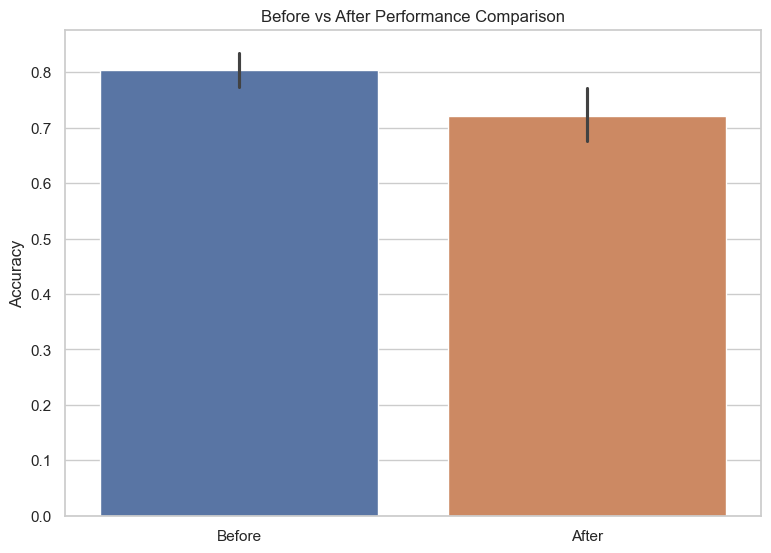

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(data=rdf_results_df)
plt.title('Before vs After Performance Comparison')
plt.ylabel('Accuracy')
plt.show()


Comparison before and after feature selection for decision tree classifier

In [ ]:
tree_results_df = pd.DataFrame({
    'Before': tree_acc,
    'After': tree_score
})
print("\nDetailed performance comparison:")
print(tree_results_df.describe())


Detailed performance comparison:
          Before      After
count  10.000000  10.000000
mean    0.734683   0.651012
std     0.062812   0.079166
min     0.615385   0.552632
25%     0.697368   0.593623
50%     0.740216   0.636302
75%     0.782895   0.712888
max     0.815789   0.789474


In [ ]:
performance_difference = np.mean(tree_score) - np.mean(tree_acc)
print(f"Difference in accuracy: {performance_difference:.4f}")


Difference in accuracy: -0.0837


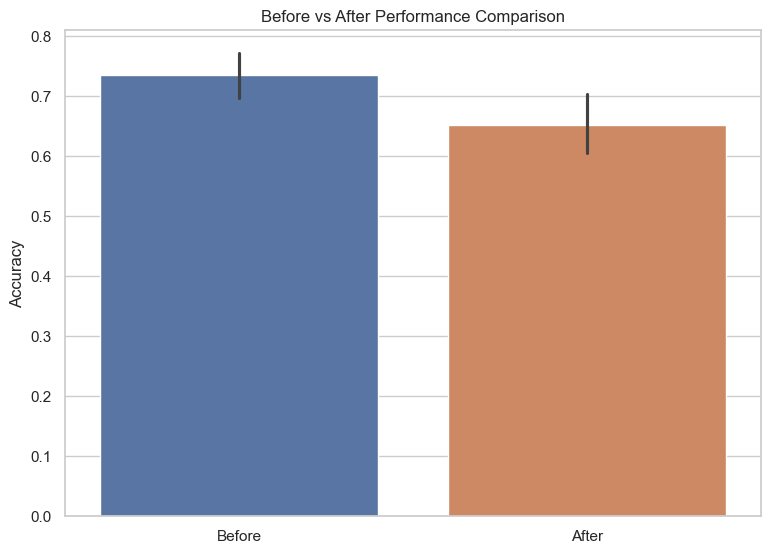

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(data=tree_results_df)
plt.title('Before vs After Performance Comparison')
plt.ylabel('Accuracy')
plt.show()


## Fine Tuning

## Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

feature_selection=RFE(estimator=tree_model, n_features_to_select=5)

dt_full_pipeline=Pipeline([
    ('feature_selection', feature_selection),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
])
dt_full_pipeline



Pipeline(steps=[('feature_selection',
                 RFE(estimator=DecisionTreeClassifier(random_state=42),
                     n_features_to_select=5)),
                ('decision_tree', DecisionTreeClassifier(random_state=42))])

In [ ]:
param_grid={
    'decision_tree__max_depth':[1,2,3,4,6,8],
    'decision_tree__criterion':['gini','entropy']}

grid_tree=GridSearchCV(dt_full_pipeline,param_grid,cv=2,scoring='accuracy')
grid_tree.fit(ds,ds_labels)

print(grid_tree.best_params_)
print( grid_tree.best_score_)


{'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 6}
0.6432291666666667


In [ ]:
cv_res = pd.DataFrame(grid_tree.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decision_tree__criterion,param_decision_tree__max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
10,0.024565,0.000437,0.000705,0.000705,entropy,6,"{'decision_tree__criterion': 'entropy', 'decis...",0.598958,0.687500,0.643229,0.044271,1
9,0.023431,0.007810,0.000000,0.000000,entropy,4,"{'decision_tree__criterion': 'entropy', 'decis...",0.619792,0.661458,0.640625,0.020833,2
3,0.025072,0.001657,0.000490,0.000490,gini,4,"{'decision_tree__criterion': 'gini', 'decision...",0.593750,0.666667,0.630208,0.036458,3
11,0.024602,0.006641,0.000000,0.000000,entropy,8,"{'decision_tree__criterion': 'entropy', 'decis...",0.619792,0.640625,0.630208,0.010417,3
4,0.023656,0.001998,0.000000,0.000000,gini,6,"{'decision_tree__criterion': 'gini', 'decision...",0.588542,0.645833,0.617188,0.028646,5


In [ ]:
feature_selection=RFE(estimator=tree_model, n_features_to_select=5)

rdf_full_pipeline=Pipeline([
    ('feature_selection', feature_selection),
    ('random_forest', RandomForestClassifier(random_state=42)),
])
rdf_full_pipeline

Pipeline(steps=[('feature_selection',
                 RFE(estimator=DecisionTreeClassifier(random_state=42),
                     n_features_to_select=5)),
                ('random_forest', RandomForestClassifier(random_state=42))])

In [ ]:
param_grid = {
    'feature_selection__n_features_to_select': [5, 10, 15, 20],  # Tune number of features selected by RFE
    'random_forest__n_estimators': [50, 100, 200],               # Tune number of trees
    'random_forest__max_features': [1, 2, 3, 4, 6, 8],           # Tune max features considered for splits
    'random_forest__max_depth': [None, 10, 20, 30]               # Tune max depth of trees
}

# Example usage with GridSearchCV
grid_rdf = GridSearchCV(rdf_full_pipeline, param_grid, cv=2, scoring='accuracy')

grid_rdf.fit(ds, ds_labels)

print(grid_rdf.best_params_)
print(grid_rdf.best_score_)


{'feature_selection__n_features_to_select': 15, 'random_forest__max_depth': None, 'random_forest__max_features': 4, 'random_forest__n_estimators': 100}
0.7786458333333333


In [ ]:
cv_res = pd.DataFrame(grid_rdf.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_feature_selection__n_features_to_select,param_random_forest__max_depth,param_random_forest__max_features,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
154,0.125563,0.000194,0.000000,0.000000,15,None,4,100,{'feature_selection__n_features_to_select': 15...,0.78125,0.776042,0.778646,0.002604,1
208,0.168670,0.004011,0.011862,0.003852,15,30,4,100,{'feature_selection__n_features_to_select': 15...,0.78125,0.776042,0.778646,0.002604,1
190,0.149574,0.024148,0.007810,0.007810,15,20,4,100,{'feature_selection__n_features_to_select': 15...,0.78125,0.776042,0.778646,0.002604,1
206,0.314650,0.000015,0.015791,0.000165,15,30,3,200,{'feature_selection__n_features_to_select': 15...,0.75000,0.786458,0.768229,0.018229,4
188,0.259483,0.024200,0.007812,0.007812,15,20,3,200,{'feature_selection__n_features_to_select': 15...,0.75000,0.786458,0.768229,0.018229,4


In [ ]:
rdf_final_model=grid_rdf.best_estimator_
rdf_final_model

Pipeline(steps=[('feature_selection',
                 RFE(estimator=DecisionTreeClassifier(random_state=42),
                     n_features_to_select=15)),
                ('random_forest',
                 RandomForestClassifier(max_features=4, random_state=42))])

## Model Evaluation

Accuracy: 0.8646
Recall: 0.8646
Precision: 0.8635
F1 Score: 0.8636

Classification Report:
              precision    recall  f1-score   support

           H       0.81      0.77      0.79        22
           L       0.89      0.96      0.93        26
           M       0.87      0.85      0.86        48

    accuracy                           0.86        96
   macro avg       0.86      0.86      0.86        96
weighted avg       0.86      0.86      0.86        96



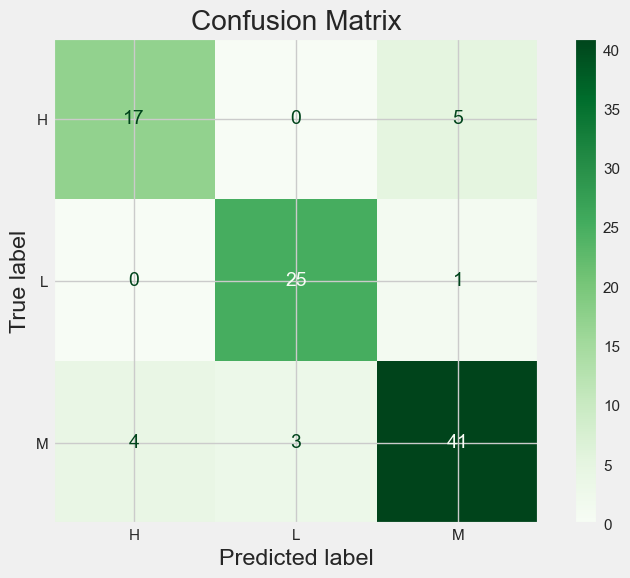

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

# Drop target column to get X_test and encode y_test
X_test = test_set.drop("Class", axis=1)
y_test = test_set["Class"].copy()

# Encode the target labels
lencoder = LabelEncoder()
y_test_encoded = lencoder.fit_transform(y_test)

# Ensure all categorical columns in X_test are encoded
x_test_encoded = X_test.copy()
for column in x_test_encoded.columns:
    if x_test_encoded[column].dtype == 'object':
        le = LabelEncoder()
        x_test_encoded[column] = le.fit_transform(x_test_encoded[column])

# Make predictions using the final model
final_predictions = rdf_final_model.predict(x_test_encoded)

# Calculate metrics
final_accuracy = accuracy_score(y_test_encoded, final_predictions)
final_recall = recall_score(y_test_encoded, final_predictions, average='weighted')
final_precision = precision_score(y_test_encoded, final_predictions, average='weighted')
final_f1 = f1_score(y_test_encoded, final_predictions, average='weighted')
conf_matrix = confusion_matrix(y_test_encoded, final_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lencoder.classes_)

# Print metrics
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"F1 Score: {final_f1:.4f}")
print('')

# Print classification report
print("Classification Report:")
print(classification_report(y_test_encoded, final_predictions, target_names=lencoder.classes_))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax, cmap='Greens')
plt.title('Confusion Matrix')
plt.show()